In [1]:
import pandas as pd
import geopandas as gpd
import shapely as shpl
import numpy as np
import ast

import plotly.express as px
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns

### Street segments

In [2]:
street_segments = pd.read_csv("transit_relacio_trams.csv")
street_segments.columns = ["street_segment_id", "description", "coordinates"]
street_segments

,street_segment_id,description,coordinates
0,1,Diagonal (Ronda de Dalt a Doctor Marañón),"2.11203535639414,41.3841912394771,2.1015028628..."
1,2,Diagonal (Doctor Marañón a Ronda de Dalt),"2.111944376806616,41.38446666680338,2.10159408..."
2,3,Diagonal (Doctor Marañón a Pl. Pius XII),"2.112093343037027,41.38422850920645,2.12264979..."
3,4,Diagonal (Pl. Pius XII a Doctor Marañón),"2.122592049318304,41.38719094189204,2.11196902..."
4,5,Diagonal (Pl. Pius XII a Pl. Maria Cristina),"2.122657659295115,41.38694195794678,2.12755961..."
...,...,...,...
522,479,Av. del Litoral (Pl. Voluntaris a Llacuna),"2.196309187682615,41.38738320091294,2.19664104..."
523,480,Salvador Espriu (Llacuna a Pl. dels Voluntaris),"2.206110221594775,41.39557698361837,2.19598389..."
524,481,Pallars (Pere IV a Bac de Roda),"2.194484346257909,41.39874607254452,2.20507879..."
525,482,Pallars (Bac de Roda a Josep Pla),"2.205093169068334,41.40667852400595,2.21190529..."


In [3]:
print("Number of duplicates:", street_segments.duplicated().sum())

street_segments.info()

Number of duplicates: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   street_segment_id  527 non-null    int64 
 1   description        527 non-null    object
 2   coordinates        527 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.5+ KB


In [4]:
street_segments["coordinates"] = street_segments.coordinates.apply(lambda x: np.array(ast.literal_eval(x)).reshape((-1, 2)))
street_segments["geometry"] = street_segments.coordinates.apply(shpl.LineString)
street_segments = gpd.GeoDataFrame(street_segments)

street_segments["geometry_len"] = street_segments.geometry.length
street_segments.head(2)

,street_segment_id,description,coordinates,geometry,geometry_len
0,1,Diagonal (Ronda de Dalt a Doctor Marañón),"[[2.11203535639414, 41.3841912394771], [2.1015...","LINESTRING (2.11204 41.38419, 2.10150 41.38163)",0.010839
1,2,Diagonal (Doctor Marañón a Ronda de Dalt),"[[2.111944376806616, 41.38446666680338], [2.10...","LINESTRING (2.11194 41.38447, 2.10159 41.38187)",0.010672


In [5]:
# # plotly visualization takes long

# fig = None
# for linestring, name in zip(street_segments.geometry, street_segments.description):
#     x, y = linestring.xy
#     fig_temp = px.line_mapbox(lat=y, lon=x, hover_name=[name]*len(y), color_discrete_sequence=["red"])
#     if not fig: 
#         fig = fig_temp
#     else:
#         fig.add_trace(fig_temp.data[0])
#     # break

            
# fig.update_layout(mapbox_style="carto-positron", width=800, height=800)
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.update_geos(fitbounds="locations")
# fig.update_layout(showlegend=False)

# fig.show()

<Axes: >

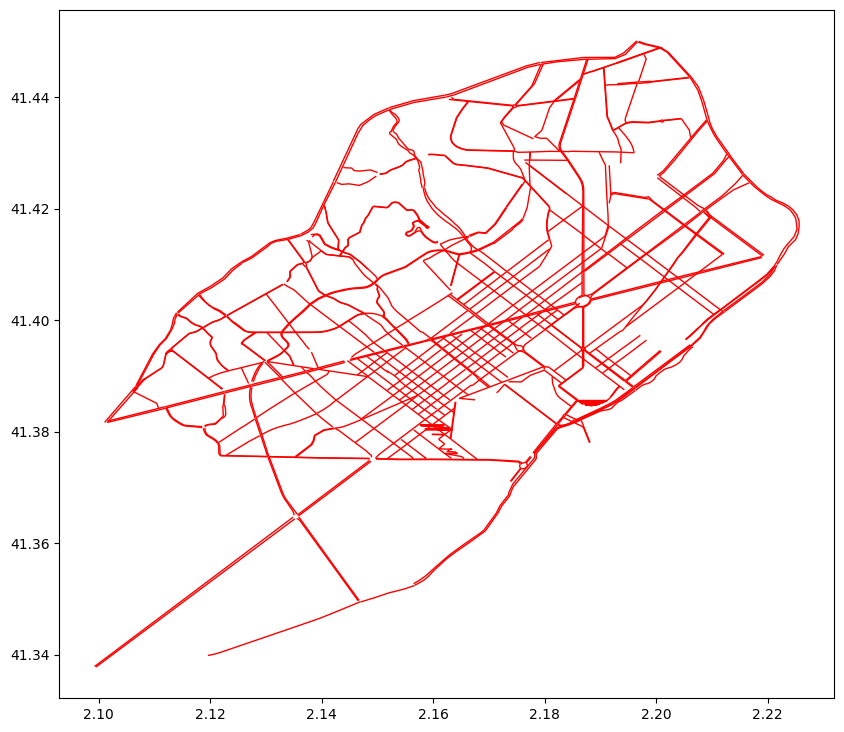

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
street_segments.plot(color="red", ax=ax, linewidth=1)

In [7]:
street_segments.geometry_len.describe(percentiles=np.arange(11)/10)

count    527.000000
mean       0.008261
std        0.005688
min        0.001012
0%         0.001012
10%        0.003716
20%        0.004498
30%        0.005531
40%        0.006239
50%        0.007213
60%        0.008285
70%        0.009279
80%        0.010509
90%        0.013079
100%       0.056375
max        0.056375
Name: geometry_len, dtype: float64

- dataset clearly does not contain all the streets of the city of Barcelona
- street segments have very different length
- some streets segments are paired (two parallel segments each for one direction of movement), while others are not

### Traffic levels

In [8]:
traffic = pd.read_csv("2023_09_traffic.csv", parse_dates=["data"])
traffic.columns = ["street_segment_id", "date_time", "current_state", "estimated_state_in_15_mins"]
traffic

,street_segment_id,date_time,current_state,estimated_state_in_15_mins
0,1,2023-09-01 00:10:52,1,1
1,2,2023-09-01 00:10:52,1,1
2,3,2023-09-01 00:10:52,1,1
3,4,2023-09-01 00:10:52,1,1
4,5,2023-09-01 00:10:52,1,1
...,...,...,...,...
2377503,535,2023-09-30 23:55:52,0,0
2377504,536,2023-09-30 23:55:52,0,0
2377505,537,2023-09-30 23:55:52,0,0
2377506,538,2023-09-30 23:55:52,0,0


In [9]:
print("Number of duplicates:", traffic.duplicated().sum())

display(traffic.info())
display(traffic.describe())

Number of duplicates: 1064
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2377508 entries, 0 to 2377507
Data columns (total 4 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   street_segment_id           int64         
 1   date_time                   datetime64[ns]
 2   current_state               int64         
 3   estimated_state_in_15_mins  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 72.6 MB


None

,street_segment_id,date_time,current_state,estimated_state_in_15_mins
count,2.377508e+06,2377508,2.377508e+06,2.377508e+06
mean,2.671898e+02,2023-09-16 00:04:05.916313088,1.156581e+00,1.059217e+00
min,1.000000e+00,2023-09-01 00:10:52,0.000000e+00,0.000000e+00
25%,1.337500e+02,2023-09-08 01:10:53,0.000000e+00,0.000000e+00
50%,2.665000e+02,2023-09-16 00:20:52,1.000000e+00,1.000000e+00
75%,3.995000e+02,2023-09-23 15:00:52,2.000000e+00,2.000000e+00
max,5.390000e+02,2023-09-30 23:55:52,6.000000e+00,6.000000e+00
std,1.546129e+02,NaN,1.252019e+00,1.293244e+00


In [10]:
traffic.drop_duplicates(inplace=True)
traffic.sort_values("date_time", inplace=True)
traffic.reset_index(drop=True, inplace=True)

In [11]:
# 41% of measurements has no data state. also, the existent model somehow predicts the future state for them
display(traffic.current_state.value_counts(normalize=True))
traffic[traffic.current_state.isin([0])].estimated_state_in_15_mins.value_counts()

current_state
0    0.411809
2    0.297179
1    0.195533
3    0.051275
4    0.021056
6    0.013146
5    0.010001
Name: proportion, dtype: float64

estimated_state_in_15_mins
0    978413
2       174
4        27
3        23
1         4
Name: count, dtype: int64

In [12]:
display(traffic.groupby("date_time").street_segment_id.count().describe()) # the number of segments is the same for each timestamp

date_times = pd.DataFrame(traffic.date_time.unique(), columns=["date_time"])
date_times.sort_values("date_time", inplace=True)
date_times["time_delta"] = date_times.date_time.shift(-1) - date_times.date_time
date_times.time_delta.describe(percentiles=np.arange(0, 11) / 10) # there are a few examples of too large intervals, but mostly they are fine

count    4467.0
mean      532.0
std         0.0
min       532.0
25%       532.0
50%       532.0
75%       532.0
max       532.0
Name: street_segment_id, dtype: float64

count                         4466
mean     0 days 00:09:40.183609493
std      0 days 00:10:19.556532409
min                0 days 00:02:57
0%                 0 days 00:02:57
10%                0 days 00:04:59
20%                0 days 00:05:00
30%                0 days 00:05:01
40%                0 days 00:05:06
50%                0 days 00:09:59
60%                0 days 00:10:00
70%                0 days 00:10:01
80%                0 days 00:10:04
90%                0 days 00:15:00
100%               0 days 04:19:59
max                0 days 04:19:59
Name: time_delta, dtype: object

count    1.366562e+06
mean     1.874547e+00
std      8.464393e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      5.000000e+00
Name: current_state, dtype: float64

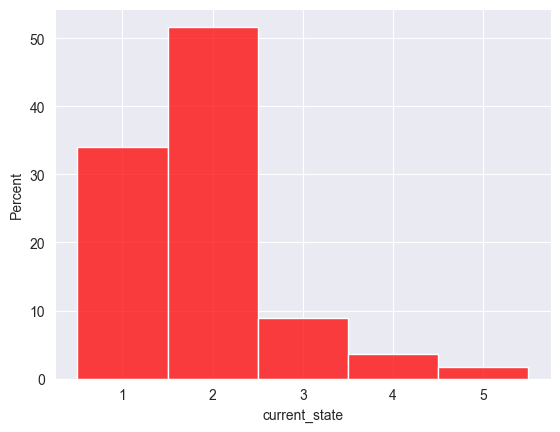

In [13]:
traffic = traffic[~traffic.current_state.isin([6, 0])] # 0 stands for no data, 6 - turned off sensor

sns.set_style("darkgrid")
sns.histplot(traffic.current_state, stat="percent", discrete=True, color="red")
traffic.current_state.describe()

/var/folders/3g/8g52nsh51_ldmjxwknrvm1j40000gn/T/ipykernel_5098/4144017871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic["day_of_week"] = traffic.date_time.dt.day_of_week
/var/folders/3g/8g52nsh51_ldmjxwknrvm1j40000gn/T/ipykernel_5098/4144017871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic["hour_in_day"] = traffic.date_time.dt.hour
/var/folders/3g/8g52nsh51_ldmjxwknrvm1j40000gn/T/ipykernel_5098/4144017871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

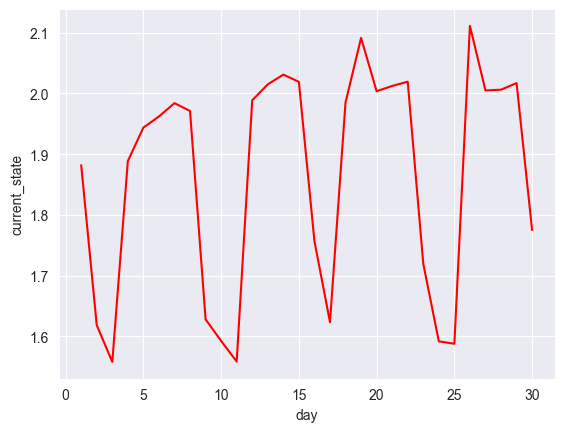

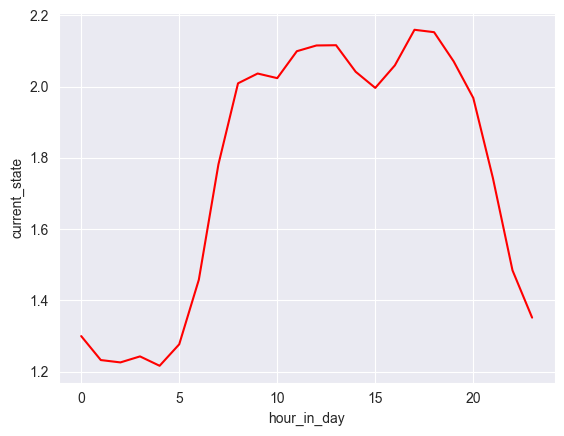

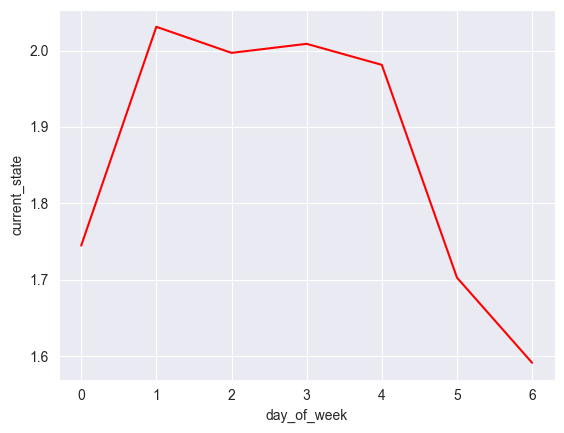

In [14]:
# average traffic states depending on day of month, day of week, hour of day
traffic["day_of_week"] = traffic.date_time.dt.day_of_week
traffic["hour_in_day"] = traffic.date_time.dt.hour
traffic["day"] = traffic.date_time.dt.day

sns.lineplot(traffic.groupby("day").current_state.mean().reset_index(), y="current_state", x="day", color="red")
plt.show()
sns.lineplot(traffic.groupby("hour_in_day").current_state.mean().reset_index(), y="current_state", x="hour_in_day", color="red")
plt.show()
sns.lineplot(traffic.groupby("day_of_week").current_state.mean().reset_index(), y="current_state", x="day_of_week", color="red")
plt.show()

Let's select random moment of time and plot the traffic levels for it 

datetime: 2023-09-24T01:50:54.000000000


<Axes: >

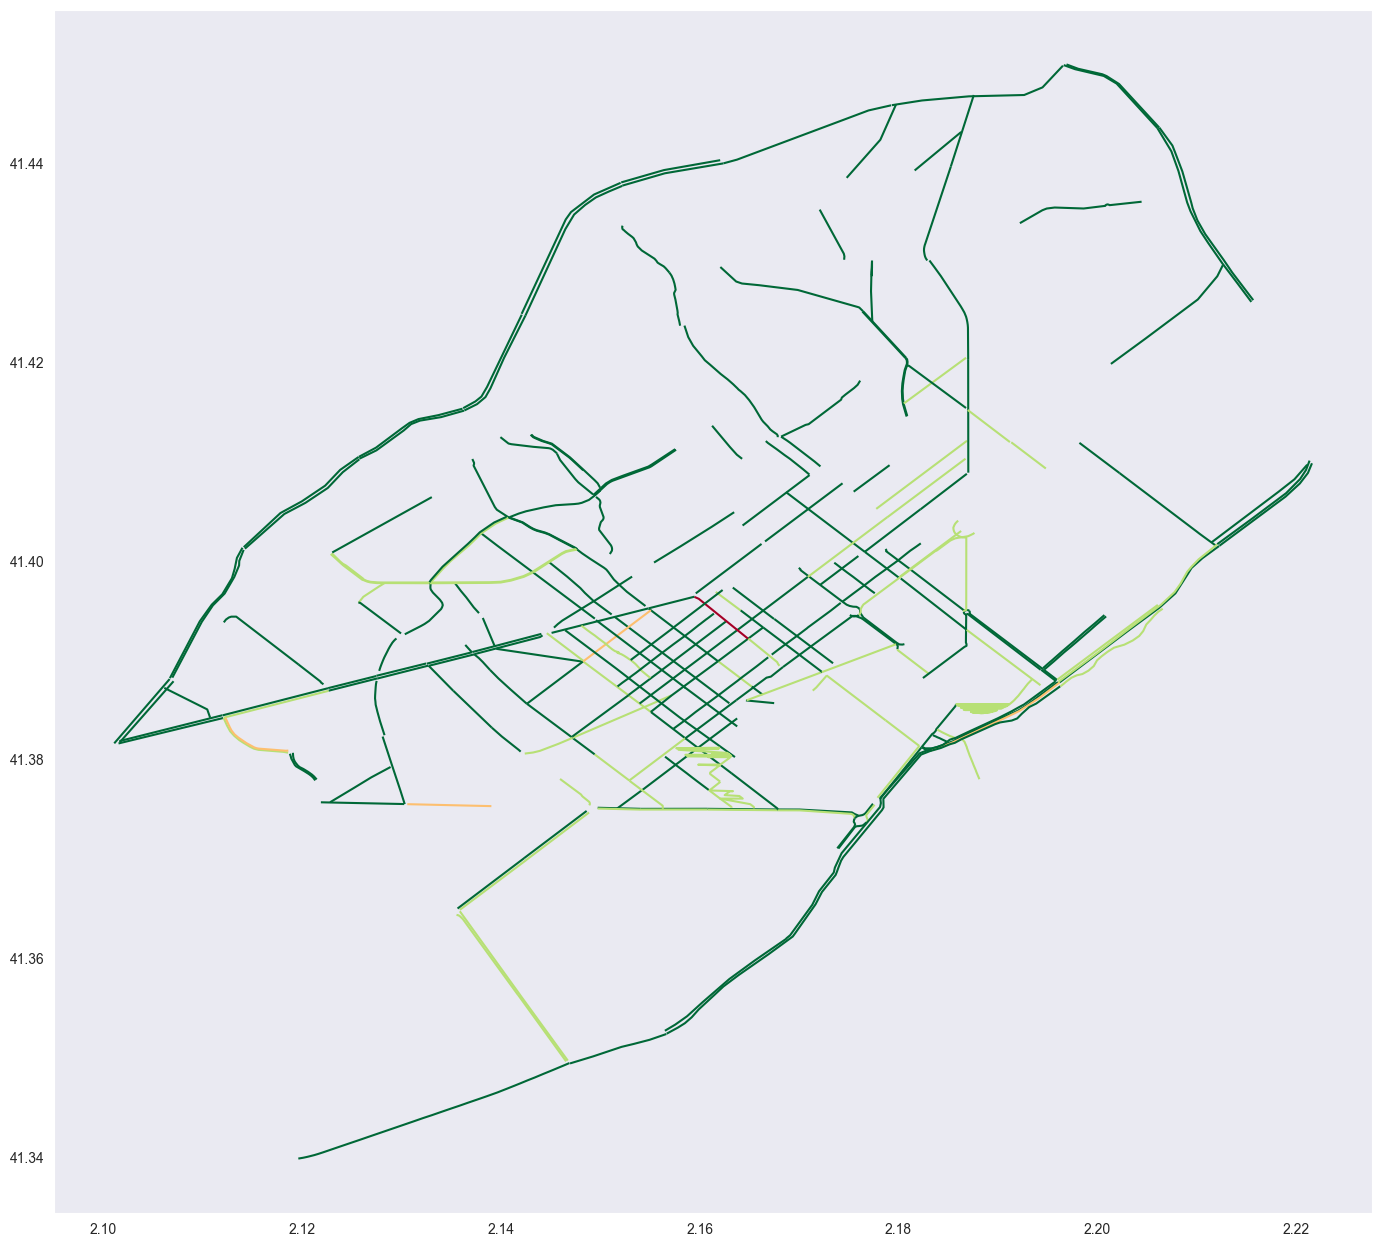

In [15]:
sns.set_style("dark")
cmap = plt.cm.RdYlGn.reversed()

date_time = traffic.date_time.sample().values[0]
# date_time = "2023-09-15 17:00:53" # the moment of intense traffic
# date_time = "2023-09-01T00:55:52" # the moment of low traffic

street_segments_traffic = pd.merge(street_segments, traffic[traffic.date_time == date_time], on="street_segment_id")
print("datetime:", date_time)

street_segments_traffic.plot(column="current_state", cmap=cmap, figsize=(17,17))

- there are 5 traffic levels (1 - low traffic). Generally the traffic is relatively low (avg=1.87)
- the measurement intervals are not consistent, but mostly are within [5, 15] mins
- traffic level seems to depend on weekday/weekend and night/day, but does not seem to have large morning/evening peaks
- traffic level does not seem to localize (e.g. in business/touristic/residential areas)

### Districts and neigbourhoods

In [16]:
districts = gpd.GeoDataFrame.from_file("BarcelonaCiutat_SeccionsCensals.csv")
districts.columns = ["district_id", "district_name", "neighbourhood_id", "neighbourhood_name", 
                     "aeb_id", "census_area_id", 
                     "geometry_etrs89", "geometry_wgs84", "geometry"
]
districts

,district_id,district_name,neighbourhood_id,neighbourhood_name,aeb_id,census_area_id,geometry_etrs89,geometry_wgs84,geometry
0,01,Ciutat Vella,01,el Raval,001,001,"POLYGON ((431076.464530388 4581077.08434164, 4...","POLYGON ((2.17574559344731 41.3782641827437, 2...",None
1,01,Ciutat Vella,01,el Raval,001,002,"POLYGON ((431023.108231672 4581164.10175305, 4...","POLYGON ((2.1750976670412 41.3790433512605, 2....",None
2,01,Ciutat Vella,01,el Raval,002,003,"POLYGON ((430778.541350762 4580924.42074461, 4...","POLYGON ((2.17220053084639 41.3768636129894, 2...",None
3,01,Ciutat Vella,01,el Raval,002,004,"POLYGON ((430630.881196672 4581028.0419057, 43...","POLYGON ((2.17042302354862 41.3777841823219, 2...",None
4,01,Ciutat Vella,01,el Raval,003,005,"POLYGON ((430938.036305269 4581297.26840996, 4...","POLYGON ((2.17406520850236 41.380235446924, 2....",None
...,...,...,...,...,...,...,...,...,...
1063,10,Sant Martí,73,la Verneda i la Pau,233,143,"POLYGON ((433903.969423829 4586241.70494589, 4...","POLYGON ((2.20899258393477 41.4250178486794, 2...",None
1064,10,Sant Martí,65,el Clot,206,234,"POLYGON ((432273.299250954 4584318.05826554, 4...","POLYGON ((2.18969468400774 41.407556353285, 2....",None
1065,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,216,235,"POLYGON ((434259.694600979 4584641.91834795, 4...","POLYGON ((2.21342322939895 41.4106381875592, 2...",None
1066,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,216,236,"POLYGON ((434142.045087524 4584575.90529832, 4...","POLYGON ((2.21202287611105 41.4100339936725, 2...",None


In [17]:
print("Number of duplicates:", districts.duplicated().sum())

display(districts.info())
display(districts.describe())

Number of duplicates: 0
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   district_id         1068 non-null   object  
 1   district_name       1068 non-null   object  
 2   neighbourhood_id    1068 non-null   object  
 3   neighbourhood_name  1068 non-null   object  
 4   aeb_id              1068 non-null   object  
 5   census_area_id      1068 non-null   object  
 6   geometry_etrs89     1068 non-null   object  
 7   geometry_wgs84      1068 non-null   object  
 8   geometry            0 non-null      geometry
dtypes: geometry(1), object(8)
memory usage: 75.2+ KB


None

,district_id,district_name,neighbourhood_id,neighbourhood_name,aeb_id,census_area_id,geometry_etrs89,geometry_wgs84,geometry
count,1068,1068,1068,1068,1068,1068,1068,1068,0
unique,10,10,73,73,233,181,1068,1068,0
top,02,Eixample,09,la Nova Esquerra de l'Eixample,070,001,"POLYGON ((431076.464530388 4581077.08434164, 4...","POLYGON ((2.17574559344731 41.3782641827437, 2...",NaN
freq,173,173,40,40,11,10,1,1,NaN


In [18]:
districts["geometry"] = districts.geometry_wgs84.apply(shpl.wkt.loads)
districts = districts[["district_id", "neighbourhood_id", "geometry"]]
districts

,district_id,neighbourhood_id,geometry
0,01,01,"POLYGON ((2.17575 41.37826, 2.17552 41.37864, ..."
1,01,01,"POLYGON ((2.17510 41.37904, 2.17470 41.37951, ..."
2,01,01,"POLYGON ((2.17220 41.37686, 2.17205 41.37695, ..."
3,01,01,"POLYGON ((2.17042 41.37778, 2.16961 41.37846, ..."
4,01,01,"POLYGON ((2.17407 41.38024, 2.17327 41.38112, ..."
...,...,...,...
1063,10,73,"POLYGON ((2.20899 41.42502, 2.20874 41.42508, ..."
1064,10,65,"POLYGON ((2.18969 41.40756, 2.18953 41.40758, ..."
1065,10,69,"POLYGON ((2.21342 41.41064, 2.21186 41.41182, ..."
1066,10,69,"POLYGON ((2.21202 41.41003, 2.21075 41.41098, ..."


<Axes: >

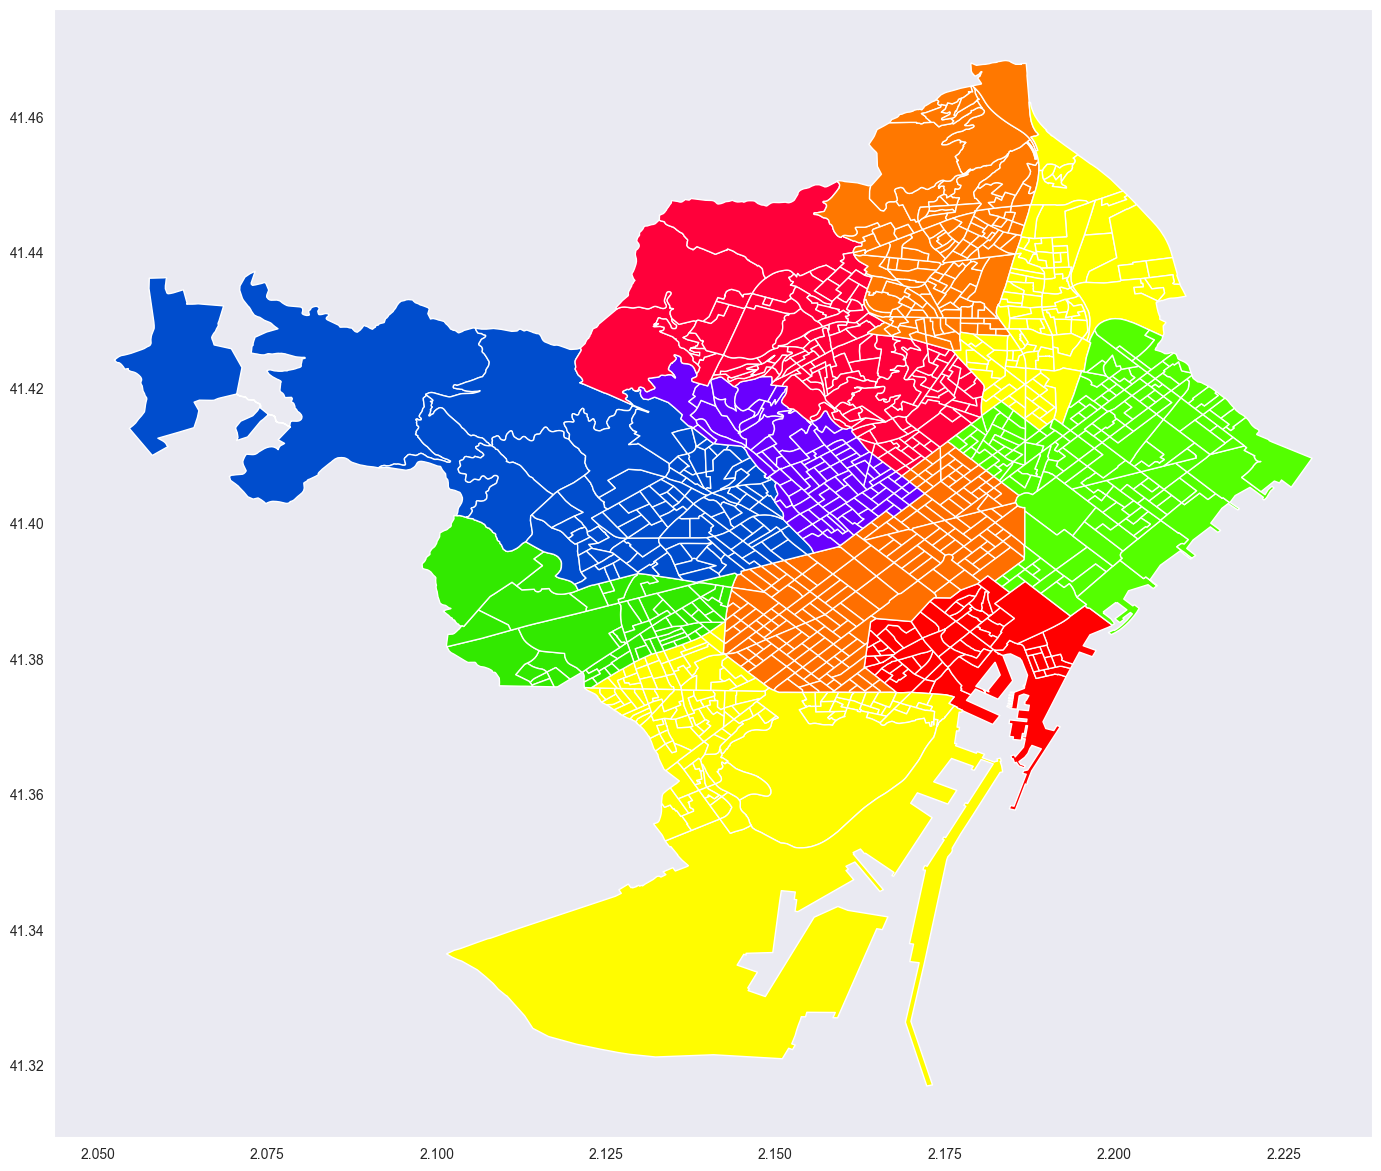

In [19]:
districts.plot(column="district_id", figsize=(17,17), cmap="prism")

<Axes: >

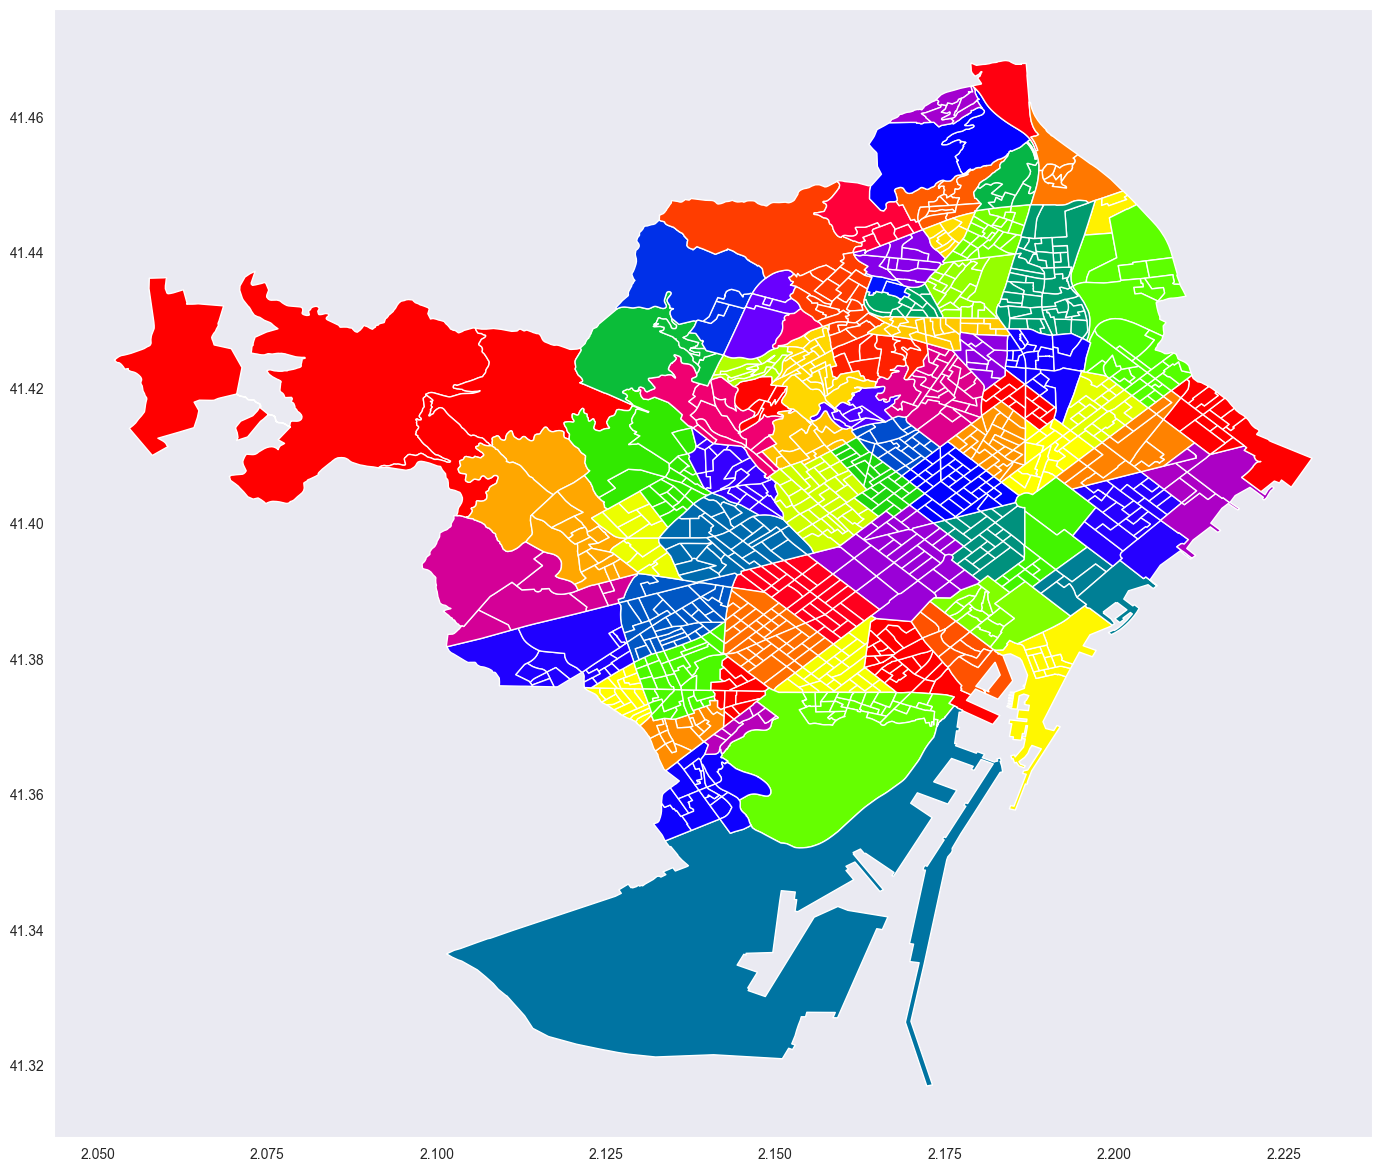

In [20]:
districts.plot(column="neighbourhood_id", figsize=(17,17), cmap="prism")

In [21]:
street_segments_district_mapping = street_segments[["street_segment_id", "geometry"]].sjoin_nearest(districts, how="left")
street_segments_district_mapping.drop_duplicates(subset=["street_segment_id", "district_id", "neighbourhood_id"], inplace=True)
street_segments_district_mapping

,street_segment_id,geometry,index_right,district_id,neighbourhood_id
0,1,"LINESTRING (2.11204 41.38419, 2.10150 41.38163)",390,04,20
1,2,"LINESTRING (2.11194 41.38447, 2.10159 41.38187)",397,04,21
2,3,"LINESTRING (2.11209 41.38423, 2.12265 41.38693)",390,04,20
3,4,"LINESTRING (2.12259 41.38719, 2.11197 41.38446)",390,04,20
3,4,"LINESTRING (2.12259 41.38719, 2.11197 41.38446)",396,04,21
...,...,...,...,...,...
525,482,"LINESTRING (2.20509 41.40668, 2.21191 41.41180)",995,10,68
525,482,"LINESTRING (2.20509 41.40668, 2.21191 41.41180)",996,10,69
525,482,"LINESTRING (2.20509 41.40668, 2.21191 41.41180)",1013,10,70
526,483,"LINESTRING (2.19603 41.43001, 2.19279 41.43016...",845,09,60


In [22]:
display(street_segments_district_mapping.groupby("district_id").street_segment_id.unique().str.len().describe())
street_segments_district_mapping.groupby("neighbourhood_id").street_segment_id.unique().str.len().describe()

count     10.00000
mean      66.80000
std       35.08656
min       39.00000
25%       46.25000
50%       52.50000
75%       71.50000
max      150.00000
Name: street_segment_id, dtype: float64

count    69.000000
mean     13.115942
std       9.807764
min       1.000000
25%       6.000000
50%      11.000000
75%      17.000000
max      64.000000
Name: street_segment_id, dtype: float64

- There are 10 districts and 73 neighbourhoods in Barcelona
- Average district contains 67 street segments and average neighbourhood contains 13 segments